# OLYMPICS EDA WEB APPLICATION

In [2]:
# Importing the necessary libraries 
import numpy as np
import pandas as pd
import plotly.express as px 
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing the dataset
df= pd.read_csv('athlete_events.csv')
region_df= pd.read_csv('noc_regions.csv')

In [4]:
# data of the atheletes 
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# Region data
region_df.head(10)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
5,ANG,Angola,NaN
6,ANT,Antigua,Antigua and Barbuda
7,ANZ,Australia,Australasia
8,ARG,Argentina,NaN
9,ARM,Armenia,NaN


In [6]:
# Checking the shape of the data
print("The number of Rows and columns in the dataset are:", df.shape)

The number of Rows and columns in the dataset are: (271116, 15)


In [7]:
# all the columns name in the dataset
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

There are 15 columns in the dataset -:

- ID': Numeric or alphanumeric identifier for each athlete.


- 'Name': Alphanumeric data containing the name of the athlete.


- 'Sex': Categorical data indicating the gender of the athlete ('M' for male, 'F' for female).


- 'Age': Numeric data representing the age of the athlete.


- 'Height': Numeric data representing the height of the athlete (in centimeters).


- 'Weight': Numeric data representing the weight of the athlete (in kilograms).


- 'Team': Alphanumeric data indicating the name of the team or country the athlete represents.


- 'NOC' (National Olympic Committee): Alphanumeric data representing the code of the National Olympic Committee associated with the athlete's country.


- 'Games': Alphanumeric data indicating the name of the Olympic Games.


- 'Year': Numeric data representing the year of the Olympic Games.


- 'Season': Categorical data indicating the season of the Olympic Games ('Summer' or 'Winter').


- 'City': Alphanumeric data indicating the city where the Olympic Games were held.


- 'Sport': Alphanumeric data indicating the sport in which the athlete competed.


- 'Event': Alphanumeric data indicating the specific event or competition within the sport.


- 'Medal': Categorical data indicating whether the athlete won a medal ('Gold,' 'Silver,' 'Bronze') or did not win a medal ('NA' or 'None').





# 1.Medal tally

This section contain all the medals won by all the nations participating in the olympics till date but this project we will only include summer olympics participation data

In [8]:
# Filtering the summer olympics data
df = df[df["Season"] == 'Summer']

In [9]:
#checking the new shape of the dataset
print("The number of Rows and columns in the dataset are:",df.shape)

The number of Rows and columns in the dataset are: (222552, 15)


In [10]:
# Merging the two dataset on the column 'Noc' to get the region name
df = df.merge(region_df ,on='NOC', how='left')

In [11]:
# All the countries that have participated 
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

Keynote

- Throughout history, there have been significant geographical changes, such as the division of Germany into two parts and the subsequent fragmentation of Russia into several smaller entities. Additionally, geographical data contain missing values

In [12]:
#count the no of countries 
df['region'].unique().shape

(206,)

In [13]:
# checking the missing values
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

#### Removing Duplicate rows

In [14]:
# Checking the duplicated rows in the dataset
df.duplicated().sum()

1385

In [15]:
# Removing the duplicate rows in the dataset
df.drop_duplicates(inplace=True)

In [16]:
# Checking the duplicated rows in the dataset again
df.duplicated().sum()

0

In [17]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
region     object
notes      object
dtype: object

#### Calculating the sum of medals won by each nations

In [18]:
df['NOC'].value_counts()

NOC
USA    14815
GBR    10776
FRA    10426
ITA     8170
GER     7526
       ...  
YMD        5
SSD        3
NBO        2
UNK        2
NFL        1
Name: count, Length: 230, dtype: int64

In [19]:
# one-hot-encoding
pd.get_dummies(df['Medal'])

,Bronze,Gold,Silver
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
222547,False,False,False
222548,False,False,False
222549,False,False,False
222550,False,False,False


In [20]:
# Concatinating the above table to the original dataframe
df = pd.concat([df,pd.get_dummies(df['Medal'])],axis=1)

In [21]:
# Converting the 'True' and 'False' to 0 and 1
df['Gold'] = df['Gold'].astype(int)
df['Bronze'] = df['Bronze'].astype(int)
df['Silver'] = df['Silver'].astype(int)

In [22]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


Keynote
- In the provided table, it is evident that when the 'Medal' column contains NaN values, all three columns ('Gold,' 'Bronze,' and 'Silver') are marked as false. Conversely, in cases where a nation has won at least one medal, the corresponding column is marked as true. 

- True has been changed to 1 and false as 0

In [23]:
# Grouping by noc and suming all the columns
df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

,region,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,Russia,1220,974,994
2,Germany,1075,987,1064
3,UK,635,729,620
4,Italy,518,474,454
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


Keynote 
- The above table is complete false as the shown data is not at all accurate, this is because instead of counting 1 medal for a team the code is counting 1 medal for each individual in the team 

- for example - If 'India' won a gold in hockey then the accurate reading in 1 but it is suming up 1 for all the players which makes 11 

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221167 entries, 0 to 222551
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     212137 non-null  float64
 4   Height  170667 non-null  float64
 5   Weight  168661 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   34077 non-null   object 
 15  region  220797 non-null  object 
 16  notes   4397 non-null    object 
 17  Bronze  221167 non-null  int32  
 18  Gold    221167 non-null  int32  
 19  Silver  221167 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(12)
memory 

In [25]:
df['NOC'] = df['NOC'].astype(str)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221167 entries, 0 to 222551
Data columns (total 20 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     212137 non-null  float64
 4   Height  170667 non-null  float64
 5   Weight  168661 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   34077 non-null   object 
 15  region  220797 non-null  object 
 16  notes   4397 non-null    object 
 17  Bronze  221167 non-null  int32  
 18  Gold    221167 non-null  int32  
 19  Silver  221167 non-null  int32  
dtypes: float64(3), int32(3), int64(2), object(12)
memory 

In [27]:
#fixing the issue
medal_tally= df.drop_duplicates(subset=['Team','NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [28]:
# Grouping by region and suming all the columns again 
medal_tally = medal_tally.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

In [29]:
medal_tally

,region,Gold,Silver,Bronze
0,USA,1035,802,708
1,Russia,592,498,487
2,Germany,444,457,491
3,UK,278,317,300
4,France,234,256,287
...,...,...,...,...
200,Lesotho,0,0,0
201,Albania,0,0,0
202,Libya,0,0,0
203,Liechtenstein,0,0,0


Observation
- After applying the filter around 50,000 rows have been removed from the dataset
- After grouping both the tables are joined on the basis of 'NOC'
- There are almost 206 countries participated in the olympics

In [30]:
# creating a new total column
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [31]:
medal_tally

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [32]:
# Olympics-analysis

# streamlit run Olympics-analysis-web-app.py

# 2. Extracting Years and Countries

In [33]:
# Loading the original dataframe
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


In [34]:
# extracting all the years when olympics was played.
years= df['Year'].unique().tolist()

In [35]:
# sorting the list of years
years.sort()

In [36]:
years

[1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [37]:
# adding overall to the first position of the list
years.insert(0,"overall")

In [38]:
years

['overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [39]:
# removing all the na values from the column
country= np.unique(df['region'].dropna().values).tolist()

In [40]:
country

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

In [41]:
# adding overall to the first position of the list
country.insert(0,"overall")

#### creating a function to provide years and country as input to the dataframe

In [42]:
medal_df = df.drop_duplicates(subset=['Team','NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])

In [43]:
def fetch_medal_tally(df, year, country):
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'])
    flag = 0

    if year == 'overall' and country == 'overall':
        temp_df = medal_df

    if year == 'overall' and country != 'overall':
        flag = 1
        temp_df = medal_df[medal_df['region'] == country]

    if year != 'overall' and country == 'overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]

    if year != 'overall' and country != 'overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]

    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

    x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

    print(x)

# Example usage:
# fetch_medal_tally(df, 'overall', 'overall')
# fetch_medal_tally(df, 'overall', 'USA')
# fetch_medal_tally(df, '2020', 'overall')
# fetch_medal_tally(df, '2020', 'USA')


In [44]:
# checking the above function
fetch_medal_tally(df= medal_df, year= 'overall', country='India')

    Year  Gold  Silver  Bronze  total
0   1900     0       2       0      2
1   1920     0       0       0      0
2   1924     0       0       0      0
3   1928     1       0       0      1
4   1932     1       0       0      1
5   1936     1       0       0      1
6   1948     1       0       0      1
7   1952     1       0       1      2
8   1956     1       0       0      1
9   1960     0       1       0      1
10  1964     1       0       0      1
11  1968     0       0       1      1
12  1972     0       0       1      1
13  1976     0       0       0      0
14  1980     1       0       0      1
15  1984     0       0       0      0
16  1988     0       0       0      0
17  1992     0       0       0      0
18  1996     0       0       1      1
19  2000     0       0       1      1
20  2004     0       1       0      1
21  2008     1       0       2      3
22  2012     0       2       4      6
23  2016     0       1       1      2


# 3.Overall Analysis

- No of editions
- No of cities
- No of events/sports
- No of athletes
- participating nations

In [45]:
# how many times olymics took placed?
df['Year'].unique().shape[0] - 1

28

- As more stress was placed on the continuing sequence of four-year Olympiads, the games of 1906 did not fit in. Hence, today the IOC does not recognize Athens 1906 as Olympic Games, and does not regard any events occurring there, such as the setting of new records or the winning of medals, as official.

- this is why we are subtracting one from the total shape as 1906 olympics was not recognized

In [46]:
# In how many cities olympics took places
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [47]:
# No of sports being played in the olympics
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

- the sports keeps on adding and being removed over time

In [48]:
# No of events take place in the olympics
df['Event'].unique().shape

(651,)

In [49]:
# extracting the number of atheletes 
df['Name'].unique().shape

(116122,)

In [50]:
df['region'].unique().shape

(206,)

#### Visualizations

In [51]:
# Calculating the participating nations in each years
nations_over_time = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('Year')

In [52]:
nations_over_time.rename(columns={'Year':'Edition', 'Edition': 'No of countries'},inplace=True)

In [53]:
nations_over_time

,Edition,count
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [54]:
# plotting the line chart
fig = px.line(nations_over_time, x='Edition', y='count')
fig.show()

Observation 

- A notable decline in the number of participating countries occurred during the 1980 Olympic Games, which were hosted by the Soviet Union (Russia). This decline can be attributed to a widespread boycott of the event by numerous nations. The primary reason behind this boycott was the Soviet Union's military intervention in Afghanistan.

- Many countries opted to abstain from participating in the 1980 Olympics in protest of the Soviet Union's actions in Afghanistan, viewing it as a violation of international norms and principles. This coordinated stance against the host nation resulted in a reduced number of participating countries and athletes in the Games, making the 1980 Olympics a significant historical event in the context of geopolitics and the Olympic movement.

In [55]:
# number of events over year
df.drop_duplicates(['Year','Event'])['Year'].value_counts().reset_index().sort_values('Year')

,Year,count
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109
24,1912,107
14,1920,158
20,1924,131
22,1928,122
21,1932,131


In [56]:
# Heatmap 
x = df.drop_duplicates(['Year', 'Sport', 'Event'])                   

In [57]:
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='Year', ylabel='Sport'>

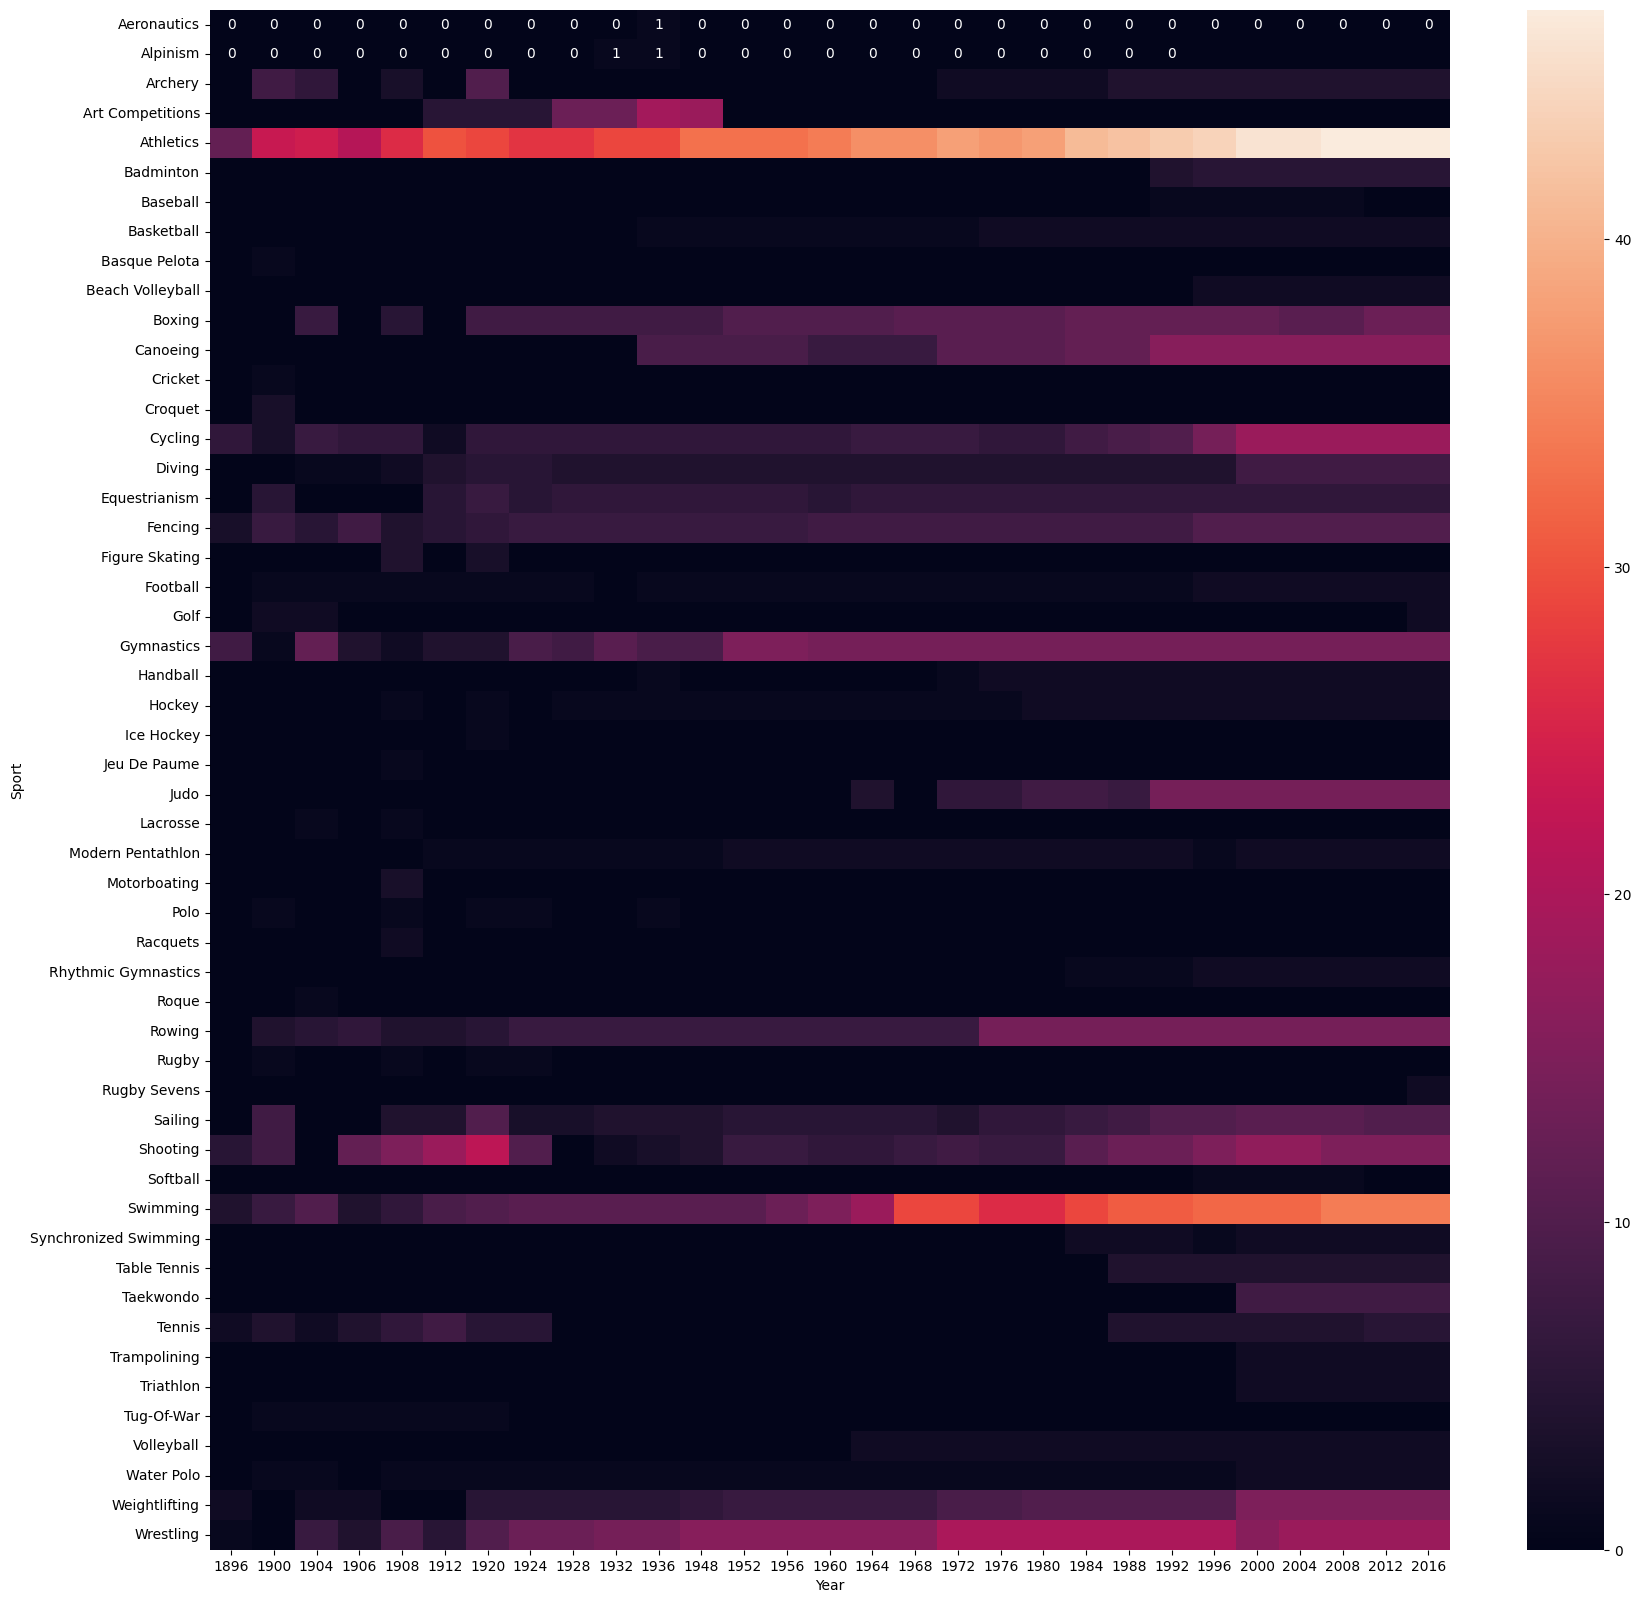

In [58]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

In [59]:
# streamlit run Olympics-analysis-web-app.py

In [60]:
# Most successful atheletes
def most_successful(df,sport):
    temp_df = df.dropna(subset=['Medal'])

    if sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == sport] 
    
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name', 'Sport', 'region']].drop_duplicates('Name')
    return x

In [61]:
most_successful(df,'Overall')

,Name,Sport,region
0,"Michael Fred Phelps, II",Swimming,USA
30,Larysa Semenivna Latynina (Diriy-),Gymnastics,Russia
49,Nikolay Yefimovich Andrianov,Gymnastics,Russia
73,Borys Anfiyanovych Shakhlin,Gymnastics,Russia
97,Takashi Ono,Gymnastics,Japan
130,Edoardo Mangiarotti,Fencing,Italy
144,"Dara Grace Torres (-Hoffman, -Minas)",Swimming,USA
157,Aleksey Yuryevich Nemov,Gymnastics,Russia
178,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",Swimming,USA
195,Birgit Fischer-Schmidt,Canoeing,Germany


# Country wise Analysis
- Country wise medal tally per year(line plot)
- What countries are good at heatmap
- Most successful Athletes(Top 10)

#### 1. Countrywise medal tally per year (line plot)

In [62]:
df['NOC'] = df['NOC'].astype(str)

In [63]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year', 'City', 'Sport', 'Event', 'Medal'], inplace=True)

C:\Users\kaift\AppData\Local\Temp\ipykernel_11968\4076372601.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
new_df = temp_df[temp_df['region'] == 'USA']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [65]:
# plotting the line chart
fig = px.line(final_df, x='Year', y='Medal')
fig.show()

#### 2. What countries are good at which sport heatmap

<Axes: xlabel='Year', ylabel='Sport'>

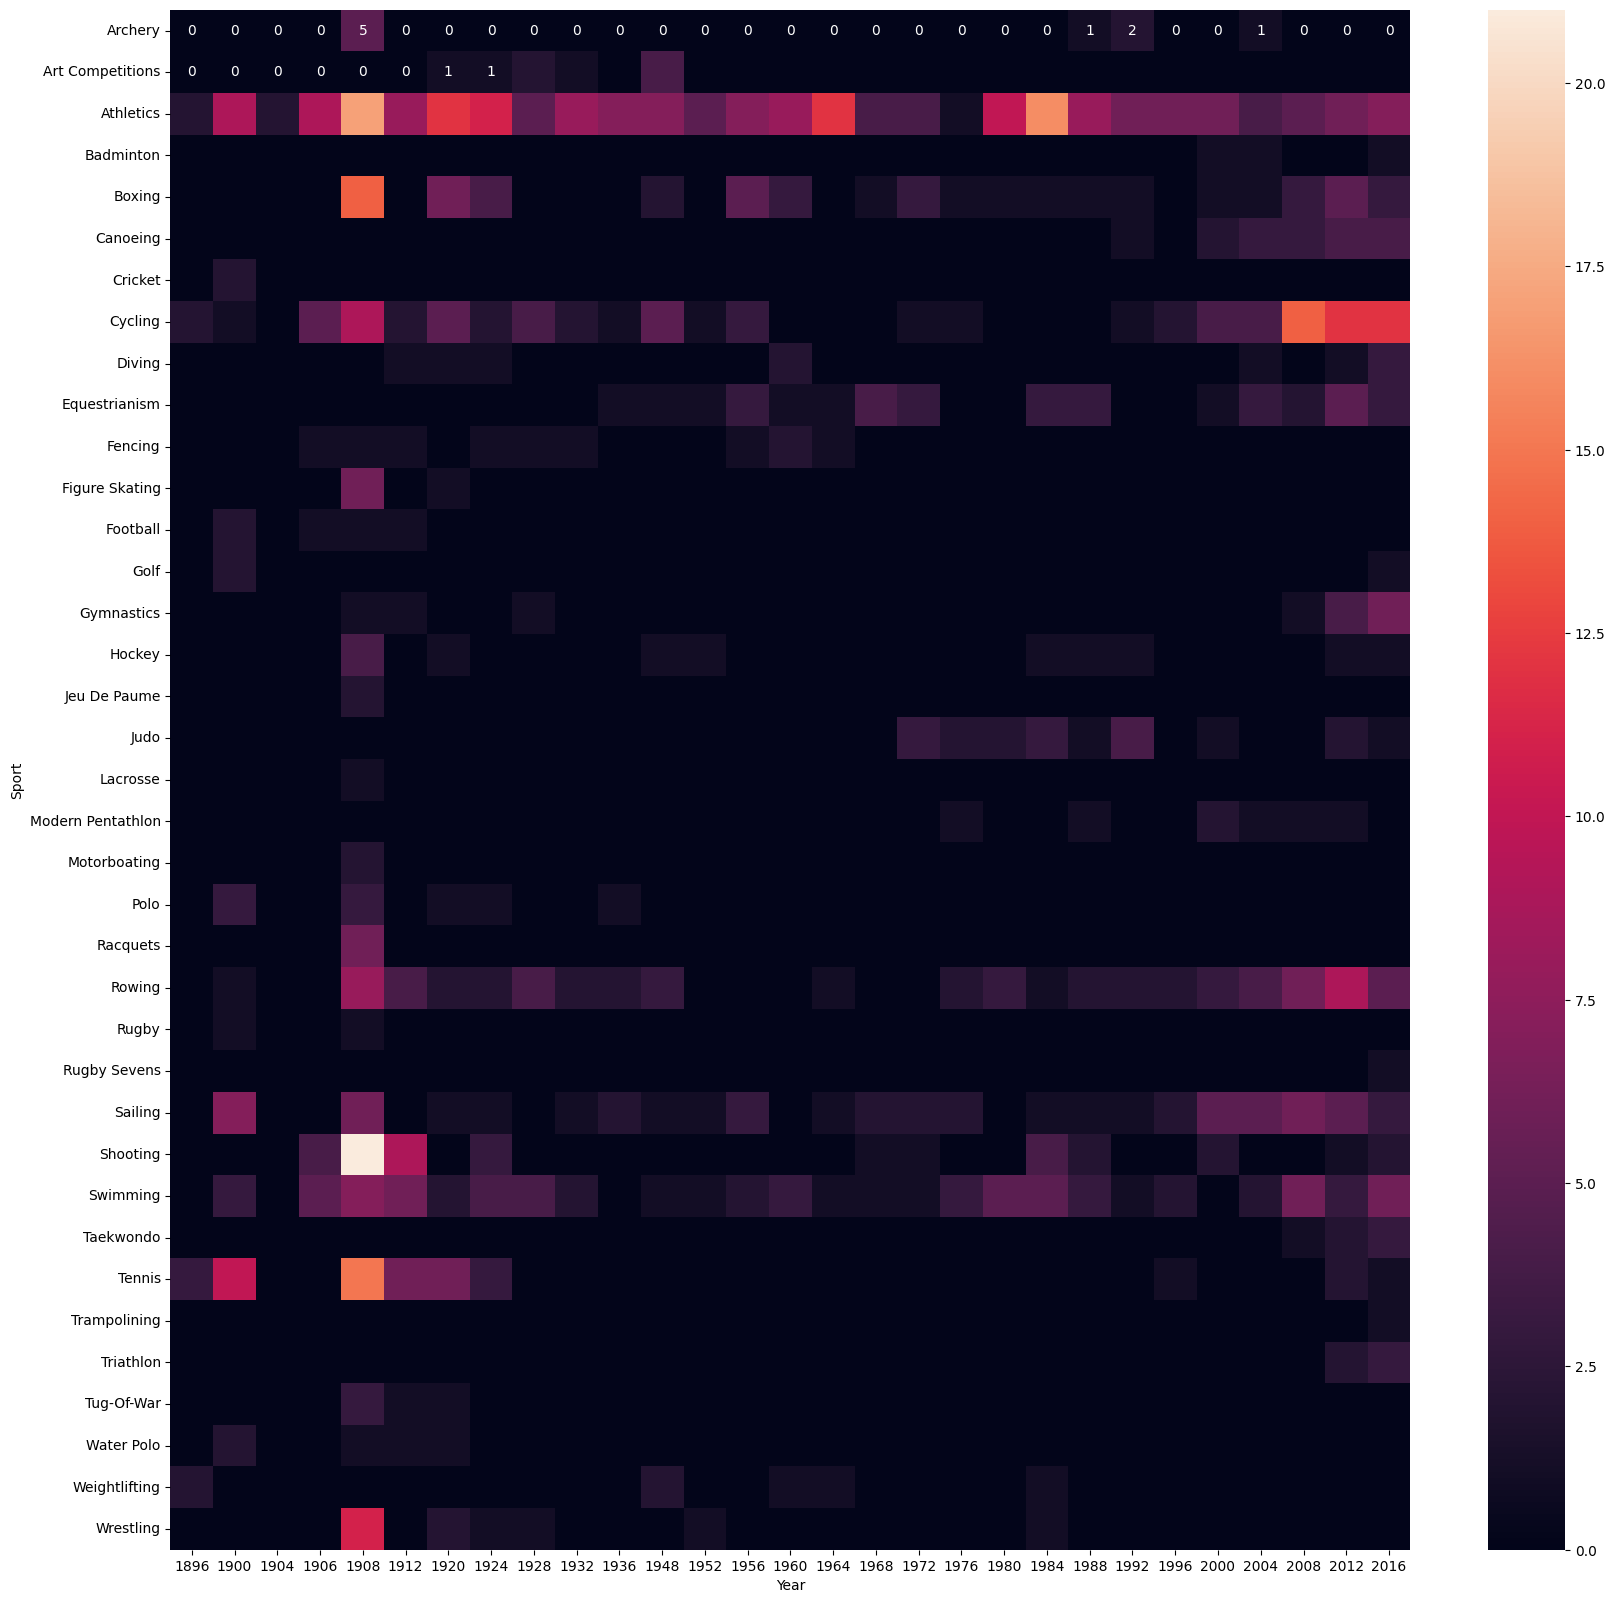

In [66]:
new_df = temp_df[temp_df['region'] == 'UK']
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport', columns='Year', values='Medal', aggfunc='count').fillna(0),annot=True)


#### 3 Most successful atheletes

In [67]:
# Most successful atheletes
def most_successful(df,country):
    temp_df = df.dropna(subset=['Medal'])

    temp_df = temp_df[temp_df['region'] == country] 

    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='Name',right_on='Name',how='left')[['Name', 'Sport']].drop_duplicates('Name')
    return x

In [68]:
most_successful(df,'India')

,Name,Sport
0,Udham Singh Kular,Hockey
4,Leslie Walter Claudius,Hockey
8,Shankar Pillay Laxman,Hockey
11,Ranganathan Francis,Hockey
14,Richard James Allen,Hockey
17,Balbir Singh,Hockey
20,Harbinder Singh Chimni,Hockey
23,"Balbir Singh Dosanjh, Sr.",Hockey
26,"Victor John ""V. J."" Peter",Hockey
29,Dhyan Chand Bais,Hockey


# Atheletes wise analysis

In [69]:
# removing duplicates as names are being repeated 
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [70]:
import plotly.figure_factory as ff

In [71]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()

In [72]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall Age', 'Gold medalist', 'Silver Medalist', 'Bronze Medalist'], show_hist=False, show_rug=False)
fig.show()

#### Weight vs height

In [73]:
athlete_df['Medal'].fillna('No Medal', inplace=True)

<Axes: xlabel='Weight', ylabel='Height'>

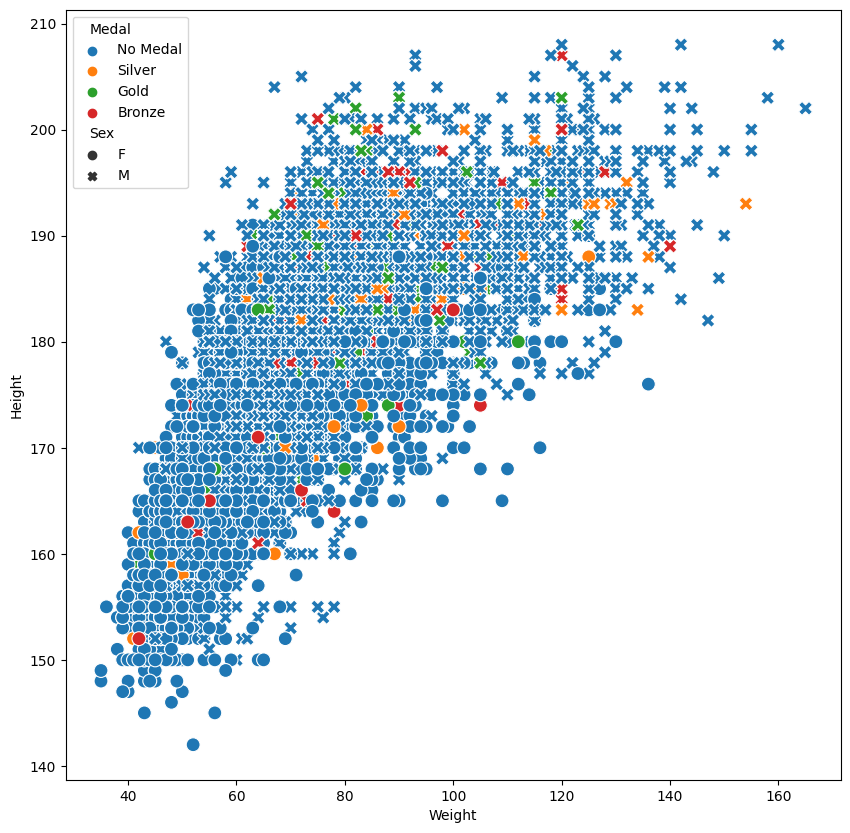

In [74]:
plt.figure(figsize=(10,10))
temp_df = athlete_df[athlete_df['Sport'] == 'Athletics']
sns.scatterplot(x = temp_df['Weight'],y = temp_df['Height'], hue=temp_df['Medal'], style=temp_df['Sex'], s=100)

Male vs female

In [75]:
men= athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
women= athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [76]:
final= men.merge(women, on='Year', how='left')
final.rename(columns={'Name_x':"Male", 'Name_y':'Female'},inplace=True)

In [77]:
final.fillna(0,inplace=True)

In [78]:
fig = px.line(final, x='Year', y=['Male','Female'])
fig.show()